In [8]:
import numpy as np
import matplotlib.pyplot as plt

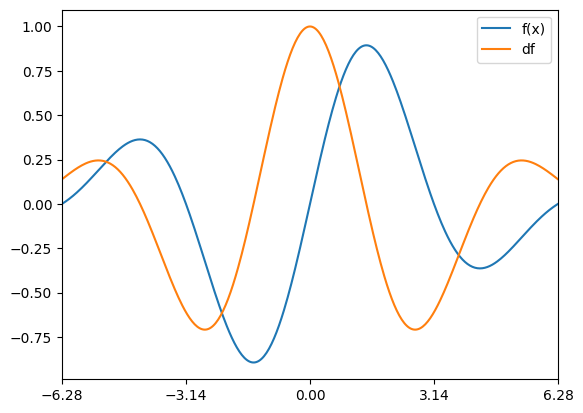

In [9]:
x  = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

plt.plot(x,fx, x,df)
plt.legend(['f(x)','df'])
plt.xlim(-2*np.pi,2*np.pi)
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
plt.show()

In [10]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

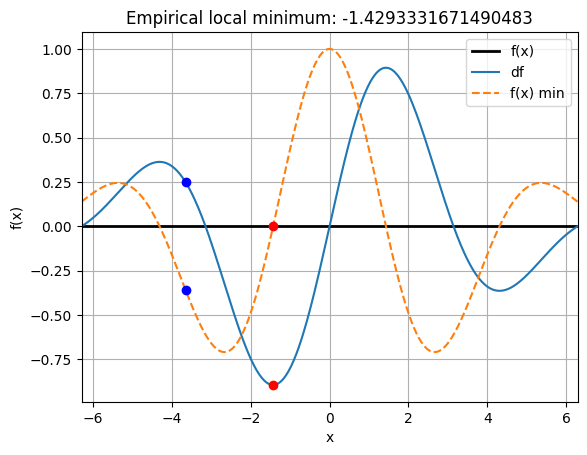

In [28]:
localmin = np.random.choice(x,1)
sample = localmin[:]

learning_rate = .01
training_epochs = 1000

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad


plt.axhline(0, color='black', linewidth=2)
plt.plot(x,fx(x), x,deriv(x),'--')

plt.plot(sample,fx(sample),'bo')
plt.plot(sample,deriv(sample),'bo')

plt.plot(localmin,fx(localmin),'ro')
plt.plot(localmin,deriv(localmin),'ro')


plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


# **Run parametric experiments**

### **Varying Starting Locations**

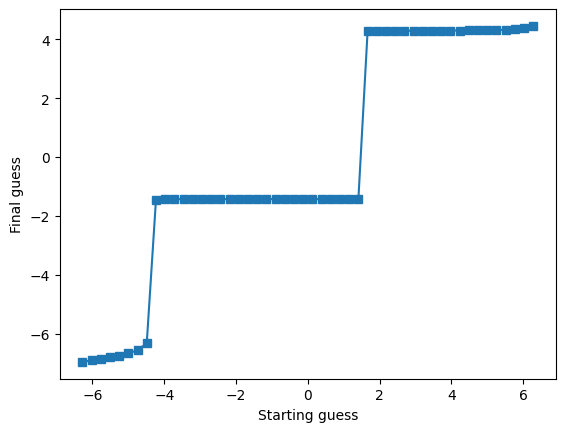

In [30]:
startlocs = np.linspace(-2*np.pi,2*np.pi,50)
finalres = np.zeros(len(startlocs))

for idx,localmin in enumerate(startlocs):
  
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
  
  finalres[idx] = localmin


plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

### **Varying the Learning Rate**

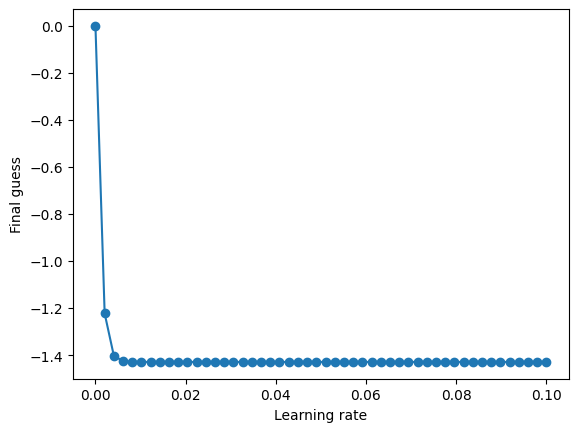

In [32]:
learning_rate = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learning_rate))

for idx,lr in enumerate(learning_rate):

    localmin = 0
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - lr*grad

    finalres[idx] = localmin

plt.plot(learning_rate,finalres,'o-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

### **interaction between learning rate and training epochs**

In [39]:
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

finalres = np.zeros((len(learningrates),len(training_epochs)))

for Lidx,learningRate in enumerate(learningrates):

  for Eidx,trainEpochs in enumerate(training_epochs):
  
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad
    
    finalres[Lidx,Eidx] = localmin

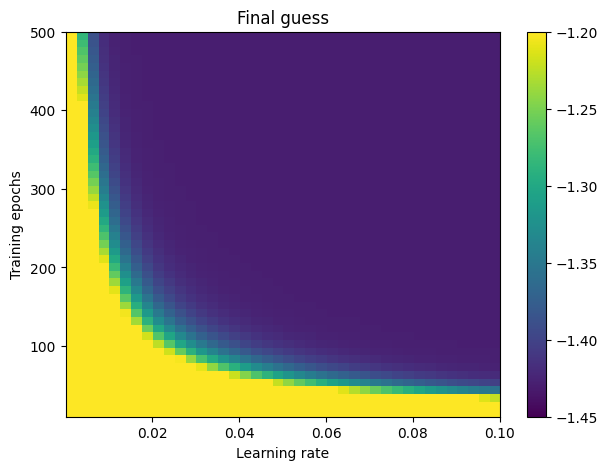

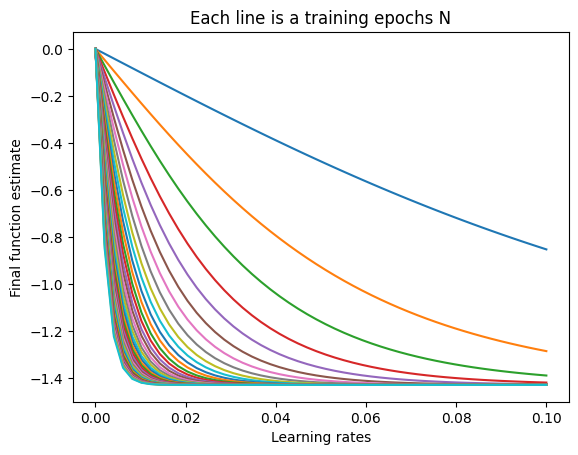

In [41]:
fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()